In [1]:
import midynet
import midynet.util.display as display
import numpy as np
import matplotlib.pyplot as plt
import pathlib

display.setup_dir("./")

plot = midynet.metrics.Statistics.plot

In [4]:
all_dynamics = ["ising", "sis", "cowan"]

path_to_data = pathlib.Path(f"/home/charles_murphy/Documents/ulaval/doctorat/projects/data/midynet-data/figure3")

small_exp = {}
for dynamics in all_dynamics:
    small_exp[dynamics] = {}
    small_exp[dynamics]["exact"] = midynet.experiments.Experiment.load_from_file(path_to_data / f"figure3-small-{dynamics}.exact/config.pickle")
#     small_exp[dynamics]["annealed"] = midynet.experiments.Experiment.load_from_file(path_to_data / f"figure3-small-{dynamics}.annealed")
#     small_exp[dynamics]["meanfield"] = midynet.experiments.Experiment.load_from_file(path_to_data / f"figure3-small-{dynamics}.meanfield")

large_exp = {}
for dynamics in all_dynamics:
    large_exp[dynamics] = {}
#     small_exp[dynamics]["annealed"] = midynet.experiments.Experiment.load_from_file(path_to_data / f"figure3-small-{dynamics}.annealed")
#     small_exp[dynamics]["meanfield"] = midynet.experiments.Experiment.load_from_file(path_to_data / f"figure3-small-{dynamics}.meanfield")

if dynamics == "sis":
    xlabel = r"Infection probability $[\alpha]$"
elif dynamics == "cowan":
    xlabel = r"Activity gain $[\nu\langle k \rangle]$"
elif dynamics == "ising":
    xlabel = r"Coupling $[J\langle k \rangle]$"

# if dynamics == "sis":
#     xmin, xmax = 0, 1
# else:
#     xmin, xmax = 0, 4
# ymin, ymax = 0, 1.1


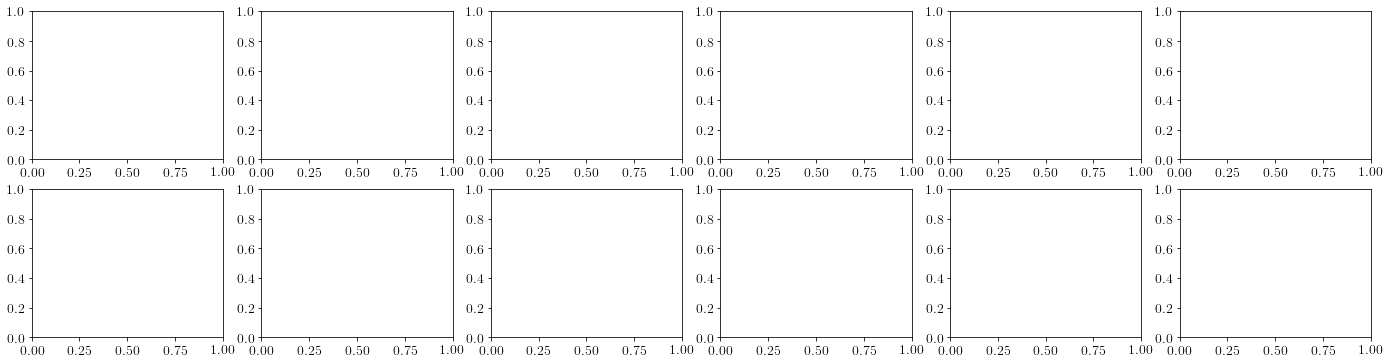

In [8]:
fig, ax = plt.subplots(2, 6, figsize=(24, 6))

for dynamics in all_dynamics:
    T = small_exp[dynamics]["exact"].config.dynamics.num_steps

In [9]:
T

[10, 100, 500]